<a href="https://colab.research.google.com/github/Mr-Pacheco/Project_Analyzing_Airbnb/blob/main/Airbnb_exploratory_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><img alt="Analisando Airbnb" width="20%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

# Análise dos Dados do Airbnb - Montreal, Canada - **PART 2**
* In this part, I will play with the clean data in **search of insights and some relevant information**.
* **I will try to understand how the real state market works in Montreal**.
* Before continuing with the analysis, I'd like to say that **there is not enough information** to understand this market, the information I'm working with is quite superficial, but despite that, **it's a good archive to improve skills in the data science area**.


*<center><img alt="Analisando Airbnb" width="40%" src="https://lh5.googleusercontent.com/XGkTVcSe5U8W4ycbatSMj-w8guzJvpircapMH_rFnyIztetCZoZErUuI09gZXfTs8sS8T-wN0oiM4FEI1iNSbAvLIExhEeLRFxMZblCIcbvrfQBnU2UrW9qH2IZ96RA2sVpgtS4Z"></center>

## Getting the data and importing the libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Reading the csv
from google.colab import files
uploaded = files.upload()

Saving Airbnb_top10.csv to Airbnb_top10 (1).csv


In [2]:
df_clean = pd.read_csv("Airbnb_top10.csv")

 ## In-depth analysis on the DataFrame
 * Looking at the data to see what I can do.
 * There are some columns that are not important for analysis, like 'id', host_id' and host_name.
 * The columns 'latitude' and 'longitude' will only serve to get a map.
 * Looks like the column 'name' have important pieces of information, but in this way, I can't analyze it.
 * The rest of the columns I will analyze.

In [3]:
df_clean.head()

,id,name,host_id,host_name,neighborhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2078,Central comfy close to Metro Laurie,2277,Nelia,Le Plateau-Mont-Royal,45.53069,-73.58588,Private room,38,2,245,2018-09-23,2.16,1,0
1,29059,Lovely studio Quartier Latin,125031,Maryline,Ville-Marie,45.51939,-73.56482,Entire home/apt,169,2,330,2020-10-27,2.58,2,350
2,29061,Maison historique - Quartier Latin,125031,Maryline,Ville-Marie,45.51929,-73.56493,Entire home/apt,248,3,69,2020-11-01,0.64,2,348
3,31847,Downtown/Airport room,2319,Gail,Le Sud-Ouest,45.48467,-73.57995,Private room,40,2,153,2020-01-07,1.19,5,0
4,34715,Chez Patrac ! Métro Beaubien,149769,Alain,Rosemont-La Petite-Patrie,45.53840,-73.60355,Entire home/apt,135,4,4,2011-09-12,0.03,1,358


In [4]:
df_clean.columns
df_analysis = df_clean[['neighborhood','room_type', 'price', 'minimum_nights','number_of_reviews', 'last_review', 'reviews_per_month',
'calculated_host_listings_count', 'availability_365']]
df_analysis.head()

,neighborhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Le Plateau-Mont-Royal,Private room,38,2,245,2018-09-23,2.16,1,0
1,Ville-Marie,Entire home/apt,169,2,330,2020-10-27,2.58,2,350
2,Ville-Marie,Entire home/apt,248,3,69,2020-11-01,0.64,2,348
3,Le Sud-Ouest,Private room,40,2,153,2020-01-07,1.19,5,0
4,Rosemont-La Petite-Patrie,Entire home/apt,135,4,4,2011-09-12,0.03,1,358


* The above DataFrame seems to me, that is the information that I will use from now on.

### The correlation between the variables

Correlation means that there is a relationship between two things. In our context, **we are looking for a relationship or similarity between two variables**.

This relationship can be measured, and it is a function of the correlation coefficient to establish its intensity. To identify the correlations between the variables of interest, I will:

* Create a correlation matrix
* Generate a * heatmap * from this matrix, using the `seaborn` library

In [5]:
# criar uma matriz de correlação
corr = df_analysis.corr()

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.057345,0.037159,0.022642,0.056209,0.106304
minimum_nights,-0.057345,1.000000,-0.049593,-0.117006,0.193648,0.187737
number_of_reviews,0.037159,-0.049593,1.000000,0.774448,-0.017103,0.083903
reviews_per_month,0.022642,-0.117006,0.774448,1.000000,0.020125,0.086407
calculated_host_listings_count,0.056209,0.193648,-0.017103,0.020125,1.000000,0.206019
availability_365,0.106304,0.187737,0.083903,0.086407,0.206019,1.000000


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]),
 <a list of 6 Text major ticklabel objects>)

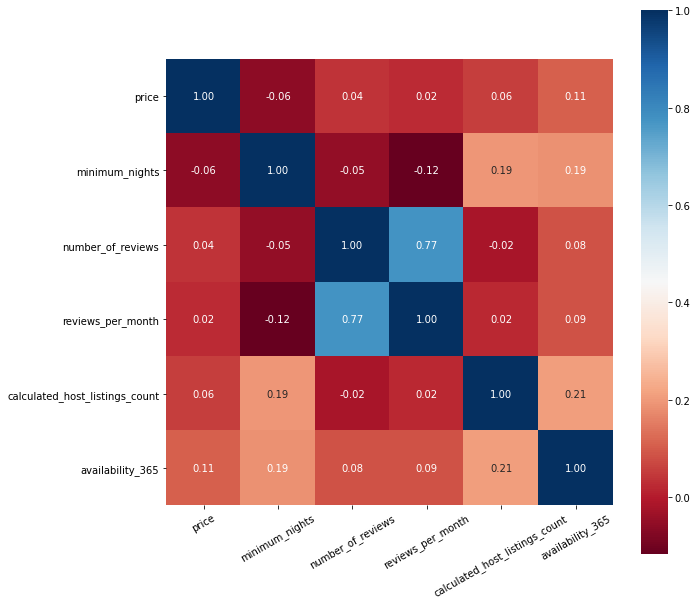

In [6]:
# Improving vizualization for better understand
fig, ax = plt.subplots(figsize=(10,10)) 
ax = sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True)
plt.xticks(rotation=30) 

* Analyzing the above correlation, there is nothing really interesting to analysis.
* Besides that, there are no columns related to the 'price' column. 

## Understading the Real state market in Montreal
 * To better understand the real state market, I will look into how the column 'neighborhood' and the 'room_type' to know how they interfere. 

In [7]:
df_analysis.groupby(['neighborhood']).price.mean().sort_values(ascending=False)

neighborhood
Outremont                               110.662252
Ville-Marie                             106.493747
Le Sud-Ouest                            104.708571
Le Plateau-Mont-Royal                    97.242451
Rosemont-La Petite-Patrie                83.888184
Verdun                                   81.250804
Côte-des-Neiges-Notre-Dame-de-Grâce      80.992979
Mercier-Hochelaga-Maisonneuve            79.088406
Villeray-Saint-Michel-Parc-Extension     77.503693
Ahuntsic-Cartierville                    77.488189
Name: price, dtype: float64

In [8]:
# There are many outliers in the column['price']
# Due to that I will reduce from $500 to $350
df_analysis = df_analysis[df_analysis['price'] <=350]
df_analysis['neighborhood'].value_counts()

Ville-Marie                             3603
Le Plateau-Mont-Royal                   3350
Rosemont-La Petite-Patrie               1255
Côte-des-Neiges-Notre-Dame-de-Grâce      984
Le Sud-Ouest                             861
Mercier-Hochelaga-Maisonneuve            684
Villeray-Saint-Michel-Parc-Extension     672
Verdun                                   309
Ahuntsic-Cartierville                    253
Outremont                                147
Name: neighborhood, dtype: int64

### Price & neighborbhood & room_type
* In my opnion, this is the best graphic and variables to understand the real state market with this DataFrame


Text(0.5, 1.0, 'Neighborhood in order of value_counts')

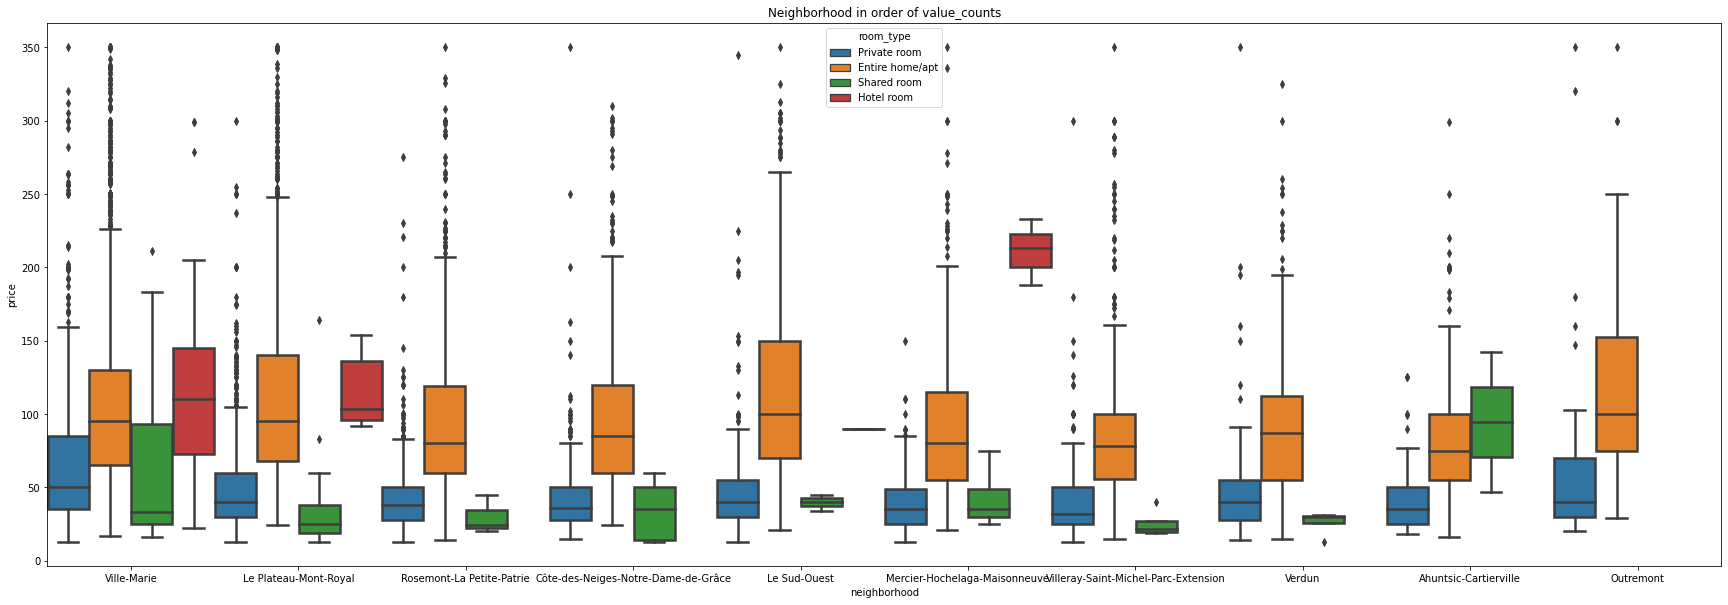

In [9]:
sequence = ['Ville-Marie','Le Plateau-Mont-Royal','Rosemont-La Petite-Patrie',
'Côte-des-Neiges-Notre-Dame-de-Grâce','Le Sud-Ouest','Mercier-Hochelaga-Maisonneuve','Villeray-Saint-Michel-Parc-Extension','Verdun','Ahuntsic-Cartierville','Outremont']
fig,ax = plt.subplots(figsize = (30 ,10))
ax = sns.boxplot(y = 'price', x = 'neighborhood', hue = 'room_type', order = sequence,
                 width = 1.0, linewidth=2.5, data = df_analysis)
plt.title('Neighborhood in order of value_counts')
# You can click in the graphic to better see it.

### **Observations**
**There are many outliers in all the data set and it can happen due to many reasons, in general, I can't get the real reason for this with this data set.**
* **Overview**
  * The price of hotel room and entire home / apt are similar and greater than shared room / private room, but the variablity in hotel room is less.
  * The price of private room and shared room are also similar
* **The difference of the neighborhoods**
  * There is not a big difference in the mean of all the neighborhoods, what is a little different from my country. 
  * All of them are very similar in matter of price.
* **How much money a person need?**
  * In this analysis, with \$100 a person can get a good home / apt and with \$150 a person can get a quite top room in all the types of room and in all of the neighborhoods.
  * Related to the private room and shared room, with \$50 you can get a place and with \$75 you can get some place top.
* **Weird points**
  * There is a weird point in the Ahuntsfic neighborhood, where the shared room is too high, besides that, it is even greater than the price of an entire home / apt.  
  * There is a few hotel in the airbnb and they are located in the big neighbourhoods (Ville_Marie and Le Plateau) and a different point, the another nighborhood that have hotel is Mercier-hochelega that is the top5, probably there can have an important point of the city.

## Analyzing the columns related to the reviews
* **These data are from december, 2020.**
* Looking at the data I think that the people on the site don't have enough incentive to get or ask for a review.
* To better understand how it works, I will analyze the columns 'number_of_reviews', 'last_review' and	reviews_per_month	


In [39]:
# Creating a data frame related to the reviews
df_clean.head()
df_review = df_clean[['number_of_reviews', 'last_review', 'reviews_per_month']]

In [40]:
# Counting how many row don't have review 
no_review = df_review[df_review['last_review'] == 'No review yet']
print(no_review['last_review'].value_counts())
print('\t')
print('Percentage of rows without review in the DataFrame : {}'.format((len(no_review)/len(df_review))))

No review yet    2728
Name: last_review, dtype: int64
	
Percentage of rows without review in the DataFrame : 0.2251196567090279


### **Observations**
* After the analysis above, it really reinforces the theory that many places don't have at least one review.
* Remembering, that these places are places for rent, including shared room, private room, hotel and home / apt, so there are many rotation in most of them.

In [41]:
# Fixing the column 'last_review' to be possible to analyze
# I will analyze just the row that have at least 1 review

df_review = df_review[df_review['last_review'] != 'No review yet']
df_review.last_review = pd.to_datetime(df_review.last_review, format="%Y-%m-%d")
df_review.head()

,number_of_reviews,last_review,reviews_per_month
0,245,2018-09-23,2.16
1,330,2020-10-27,2.58
2,69,2020-11-01,0.64
3,153,2020-01-07,1.19
4,4,2011-09-12,0.03


In [59]:
# Creating two new columns, the first related to the year and the second related to the month
# Considering just the places that have at least 1 review

df_review['year'] = df_review.last_review.dt.year
df_review['month'] = df_review.last_review.dt.month
df_review.describe()

,number_of_reviews,reviews_per_month,year,month
count,9390.000000,9390.000000,9390.000000,9390.000000
mean,27.662407,0.898867,2019.148669,7.746645
std,51.276530,1.266270,1.152013,3.358133
min,1.000000,0.010000,2011.000000,1.000000
25%,3.000000,0.130000,2019.000000,6.000000
50%,8.000000,0.370000,2020.000000,8.000000
75%,28.000000,1.127500,2020.000000,10.000000
max,638.000000,15.330000,2020.000000,12.000000


**Analyzing the percentage to improve our understand of the data**

In [43]:
print(df_review['year'].value_counts())
print('\t')
print('Number of places with at least 2 years without review : {}'.format(df_review[df_review['year'] <= 2018]['year'].count()))
print('Percentage with at least 2 years without review : {}'.format(df_review[df_review['year'] <= 2018]['year'].count()/len(df_clean)))
print('\t')
print('Number of places with at least 1 years without review : {}'.format(df_review[df_review['year'] <= 2019]['year'].count()))
print('Percentage with at least 1 years without review : {}'.format(df_review[df_review['year'] <= 2019]['year'].count()/len(df_clean)))

2020    4963
2019    2360
2018    1012
2017     687
2016     320
2015      32
2014       7
2013       6
2012       2
2011       1
Name: year, dtype: int64
	
Number of places with at least 2 years without review : 2067
Percentage with at least 2 years without review : 0.17057270176596798
	
Number of places with at least 1 years without review : 4427
Percentage with at least 1 years without review : 0.36532431094239975


In [64]:
print('Number of people with less than 0.2 reviews_per_month : {}'.format(df_clean[df_clean['reviews_per_month'] <= 0.2]['reviews_per_month'].count()))
print('Size of the DataFrame : {}'.format(len(df_clean)))
print('\t')
print('Percentage : {}'.format(df_clean[df_clean['reviews_per_month'] <= 0.2]['reviews_per_month'].count()/len(df_clean)))

Number of people with less than 0.2 reviews_per_month : 6034
Size of the DataFrame : 12118
	
Percentage : 0.49793695329262255


### **Observations**
* Percentange that doesn't have at least 1 review on the website = 22.5%

* At least 2 years without review = 17%
* At least 1 year without review = 36.5%
  * The 17% is whithin the 36.5%.
* Percentage of place with less than 0.2 reviews_per_month : 50%
  * I considered all the DataFrame

## Plotting the Montreal city with all of the houses and hotel in Airbnb
* First, I will get the maximum and minimum longitude and latitude, this will serve to plot the graph togheter with the figure.
* After that, I will create the figure in www.openstreetmap.org and extract to google colab.
* Then, I will plot the graph + the figure to understand how Montreal works and I will plot the graph + price to understand how the real state market works in Montreal.

In [15]:
print(df_clean.longitude.min())
print(df_clean.longitude.max())
print(df_clean.latitude.min())
print(df_clean.latitude.max())

-73.72961
-73.50784
45.43684
45.61461


In [17]:
# Importing and extracting the figure
from google.colab import files
from io import BytesIO
from PIL import Image

uploaded = files.upload()
im = Image.open(BytesIO(uploaded['test3.png']))

Saving test3.png to test3 (1).png


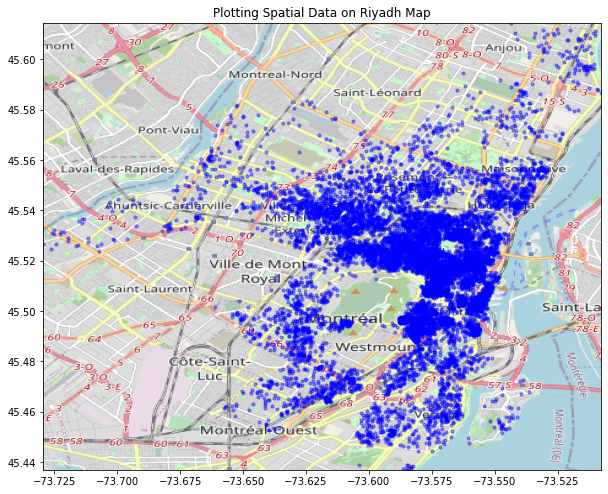

In [19]:
BBox = ((df_clean.longitude.min(),   df_clean.longitude.max(),      
         df_clean.latitude.min(), df_clean.latitude.max()))
fig, ax = plt.subplots(figsize = (10,10))
ax.scatter(df_clean.longitude, df_clean.latitude, zorder=1, alpha= 0.4, c='b', s=10)
ax.set_title('Plotting Spatial Data on Riyadh Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(im, zorder=0, extent = BBox, aspect= 'equal')

### **Observations**
* With the graphic above, it is possible to understand Montreal and where most people are, I think that is the center of the city.
* With the graphic below, it's possible to see the price of the houses and hotels in across the city.

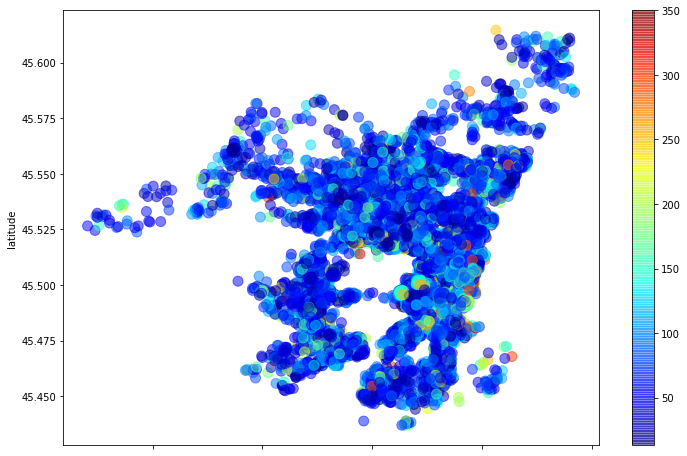

In [18]:
# plotar os imóveis pela latitude-longitude
df_clean = df_clean[df_clean['price'] <= 350]
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.5, c=df_clean['price'], s=100,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

## Conclusion
  After all this analysis, there are some points that I would like to comment.**There are very little relations between the columns**, I am very surprised with this, it's totally different that I was expecting, maybe due to the lack of data that was provided for Airbnb.

  In general, Montreal is the biggest city in Canada and is quite interesting, **there is no big difference between the neighborhoods**. There are many people in Montreal but the part where the people live in the city is not so far from the center. Besides that, **the price seems ok for me**, considering that the person who lives there earn in dolar and the minimum wage.

  Furthermore, **I didn't see many hotels on the site** which is a little interesting, because there are many places to rent and few hotels. And **the number of private room and shared room is big**, I wasn't expecting this, **it seems to me that it is very normal there**.

  Moreover, I'd like to comment about the review, I don't know why but it seems to me that **the people don't like to review on the places or there are not too many incentives to left a review**. For me, it's important, because when I will rent an apt / home, use the services of a company, buy in a website, everything that I buy for me, the opinions of other people who had this experience before in that place is something that I would like to see.

  Lastly, **there are many outliers** that I can't understand what is exactly happening, there are some reasons that could be possible from scam to a big mansion.